# Procurando um novo melhor modelo.

Pesquisa "bruta" por um melhor modelo baseado [neste notebook do Kaggle](https://www.kaggle.com/mirach21/titanic-classification-notebook#6-Modelling-).

## Preparando o ambiente

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
SEED = 5
np.random.seed(SEED)

## Carregando os dados

In [6]:
treino = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/train_dummies_2.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/test_dummies_2.csv')
Xvalidation = teste.drop(columns=['PassengerId'])
treino.head(2)

X = treino.drop(columns=['Survived'])
y = treino['Survived']

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size = 0.2, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 712 elementos e testaremos com 179 elementos


## Analisando comportamento geral de diferentes modelos

In [8]:
def model_crossval_accuracy(model):
    accuracy = round(cross_val_score(model, treino_x, treino_y, cv=10, scoring='accuracy').mean() * 100, 2)
    return accuracy

In [12]:
lr = LogisticRegression(solver='liblinear')
svc = SVC(gamma = "auto")
rf = RandomForestClassifier(random_state = SEED, n_estimators = 100)
knn = KNeighborsClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier(random_state = SEED)
gbc = GradientBoostingClassifier(random_state = SEED)
abc = AdaBoostClassifier(random_state = SEED)
etc = ExtraTreesClassifier(random_state = SEED)
xgbc = XGBClassifier(random_state = SEED, use_label_encoder=False)

models = [lr, svc, rf, knn, gnb, dt, gbc, abc, etc, xgbc]
models_str = ['lr', 'svc', 'rf', 'knn', 'gnb', 'dt', 'gbc', 'abc', 'etc', 'xgbc']

crossval_scores = list(map(model_crossval_accuracy, models))
crossval_scores_df = pd.DataFrame(crossval_scores, columns=['score'], index=models_str).sort_values(by="score", ascending=False)

C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\salat\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
crossval_scores_df

,score
abc,81.74
gbc,80.76
svc,80.06
lr,79.49
xgbc,78.23
dt,77.53
rf,77.52
gnb,77.10
etc,75.70
knn,75.28


## Tunning models

Isso já foi feito com outros notebooks mas ainda nenhum vários dos algoritimos usados aqui não tinham sido usados antes, assim como a forma que o GridSearchCV foi usado. Vamos revalidar o modelo e tentar usar um ensamble sobre ele.

In [15]:
def tune_model_params(model, params):
    gridsearch = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=10)
    gridsearch.fit(treino_x, treino_y)
    best_params, best_score = gridsearch.best_params_, round(gridsearch.best_score_*100, 2)
    return best_params, best_score

In [16]:
lrParams = {"penalty":["l1", "l2"],
            "C": np.logspace(0, 4, 10),
            "max_iter":[5000]}

gbcParams = {"learning_rate": [0.01, 0.02, 0.05, 0.01],
              "max_depth": [4, 6, 8],
              "max_features": [1.0, 0.3, 0.1], 
              "min_samples_split": [ 2, 3, 4],
              "random_state":[SEED]}

svcParams = {"C": np.arange(6,13), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1, 0.001, 0.0001]}

dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(2,16), 
             "min_samples_leaf":np.arange(1,12),
             "random_state":[SEED]}

rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25, 30, 100, 200],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,8), 
             "max_features":["sqrt", "auto", "log2"],
             "max_depth": range(3, 100, 4),
             "n_jobs": [-1],
             "random_state":[SEED]}

knnParams = {"n_neighbors":np.arange(3,9),
              "leaf_size":[1, 2, 3, 5],
              "weights":["uniform", "distance"],
              "algorithm":["auto", "ball_tree","kd_tree","brute"]}

abcParams = {"n_estimators":[1, 5, 10, 15, 20, 25, 40, 50, 60, 80, 100, 130, 160, 200, 250, 300],
              "learning_rate":[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5],
              "random_state":[SEED]}

etcParams = {"max_depth":[None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "min_samples_leaf":[1, 3, 10],
              "bootstrap":[False],
              "n_estimators":[100, 300],
              "criterion":["gini"],
              "random_state":[SEED]}

models_totune = [lr, svc, rf, knn, dt, gbc, abc, etc]
models_totune_str = ['lr', 'svc', 'rf', 'knn', 'dt', 'gbc', 'abc', 'etc']
models_totune_params = [lrParams, svcParams, rfParams, knnParams, dtParams, gbcParams, abcParams, etcParams]
best_params_and_scores = list(map(tune_model_params, models_totune, models_totune_params))

A execução desse tunning pode levar um tempo considerável para rodar.

In [17]:
best_params_and_scores_df = pd.DataFrame(best_params_and_scores, columns=['best_params', 'best_score'], index=models_totune_str).sort_values(by='best_score', ascending=False)
pd.set_option("max_colwidth", None)
best_params_and_scores_df

,best_params,best_score
gbc,"{'learning_rate': 0.01, 'max_depth': 6, 'max_features': 0.3, 'min_samples_split': 4, 'random_state': 5}",83.15
abc,"{'learning_rate': 0.2, 'n_estimators': 50, 'random_state': 5}",82.02
dt,"{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 5}",81.88
etc,"{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 5}",81.33
rf,"{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10, 'random_state': 5}",81.04
svc,"{'C': 11, 'gamma': 0.001, 'kernel': 'rbf'}",81.03
lr,"{'C': 21.544346900318832, 'max_iter': 5000, 'penalty': 'l1'}",79.78
knn,"{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 8, 'weights': 'distance'}",77.67


In [18]:
gbc = GradientBoostingClassifier(**best_params_and_scores_df.loc['gbc', 'best_params'])
rf  = RandomForestClassifier(**best_params_and_scores_df.loc['rf', 'best_params'])
abc = AdaBoostClassifier(**best_params_and_scores_df.loc['abc', 'best_params'])
dt  = DecisionTreeClassifier(**best_params_and_scores_df.loc['dt', 'best_params'])
etc = ExtraTreesClassifier(**best_params_and_scores_df.loc['etc', 'best_params'])
knn = KNeighborsClassifier(**best_params_and_scores_df.loc['knn', 'best_params'])
lr  = LogisticRegression(**best_params_and_scores_df.loc['lr', 'best_params'], solver='liblinear')
svc = SVC(**best_params_and_scores_df.loc['svc', 'best_params'])

In [22]:
def prediction_and_confusion_matrix_scoress(model, X_train, y):
    prediction = cross_val_predict(model, X_train, y, cv=10)
    confusion_matrix = pd.crosstab(y, prediction, rownames=['actual'], colnames=['predicted'], margins=True)
    #correct_pred = (confusion_matrix.loc[0, 0] + confusion_matrix.loc[1, 1])
    classificationReport = pd.DataFrame(classification_report(y, prediction, output_dict=True)).transpose()
    title = str(model).split('(')[0]
    display(title)
    display(confusion_matrix)
    display(classificationReport)

for model in [gbc,rf,abc]:
    display(prediction_and_confusion_matrix_scoress(model, treino_x, treino_y))

'GradientBoostingClassifier'

predicted,0,1,All
actual,,,
0,416,23,439
1,97,176,273
All,513,199,712


,precision,recall,f1-score,support
0,0.810916,0.947608,0.873950,439.000000
1,0.884422,0.644689,0.745763,273.000000
accuracy,0.831461,0.831461,0.831461,0.831461
macro avg,0.847669,0.796148,0.809856,712.000000
weighted avg,0.839100,0.831461,0.824799,712.000000


None

'RandomForestClassifier'

predicted,0,1,All
actual,,,
0,395,44,439
1,91,182,273
All,486,226,712


,precision,recall,f1-score,support
0,0.812757,0.899772,0.854054,439.000000
1,0.805310,0.666667,0.729459,273.000000
accuracy,0.810393,0.810393,0.810393,0.810393
macro avg,0.809033,0.783219,0.791756,712.000000
weighted avg,0.809902,0.810393,0.806281,712.000000


None

'AdaBoostClassifier'

predicted,0,1,All
actual,,,
0,387,52,439
1,76,197,273
All,463,249,712


,precision,recall,f1-score,support
0,0.835853,0.881549,0.858093,439.000000
1,0.791165,0.721612,0.754789,273.000000
accuracy,0.820225,0.820225,0.820225,0.820225
macro avg,0.813509,0.801580,0.806441,712.000000
weighted avg,0.818718,0.820225,0.818484,712.000000


None

Analisando a importância de cada feature:

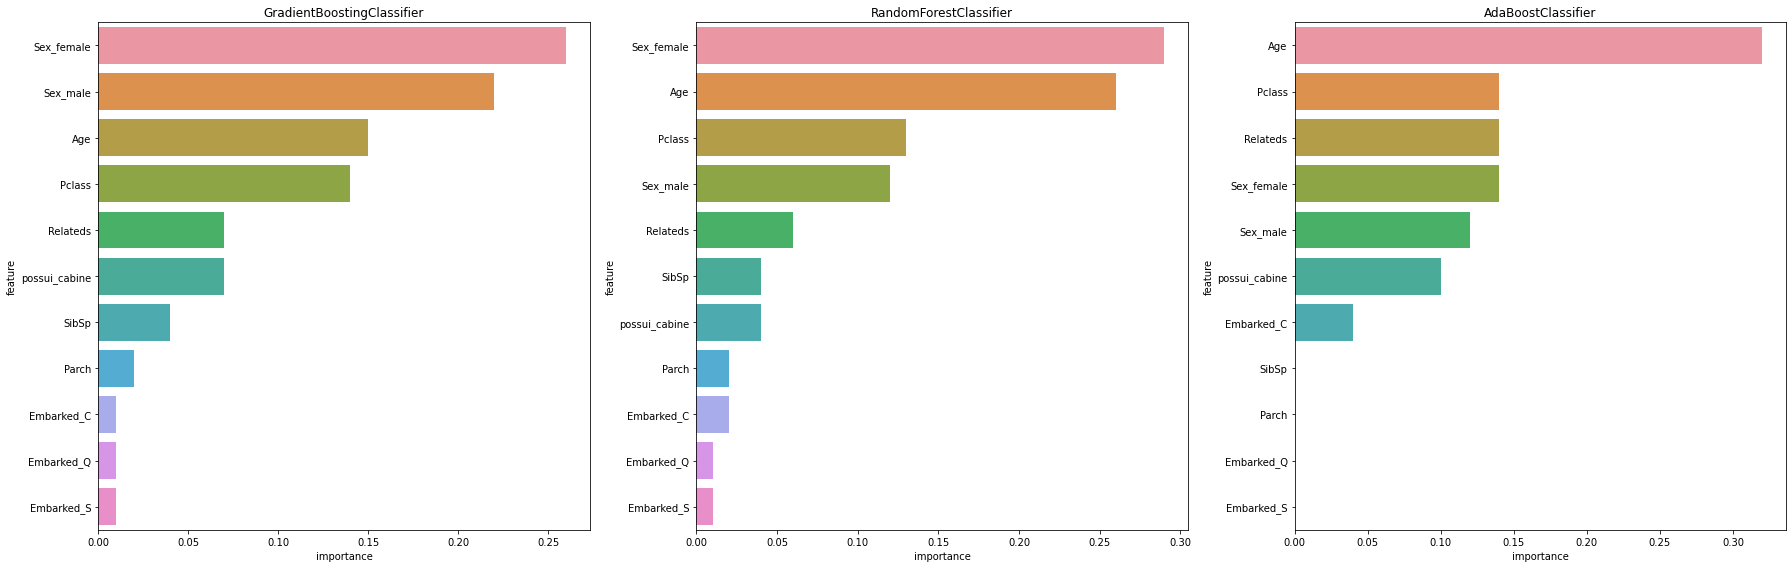

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

In [25]:
for model in [lr, svc, rf, knn, dt, gbc, abc, etc]:
    model.fit(treino_x, treino_y)

def feature_importance(models):
    n = len(models)
    f, axes = plt.subplots(1, n, figsize=(25,8))
    for i, model in enumerate(models):
        importance_df = pd.DataFrame({"feature": treino_x.columns, "importance": np.round(model.feature_importances_,2)}).sort_values(by = "importance", ascending = False)
        plt.figure(figsize=(20,40))
        title = str(model).split('(')[0]
        sns.barplot(ax = axes[i], x='importance', y='feature', data=importance_df).set_title(title)
    f.tight_layout()
        

feature_importance([gbc,rf,abc])

Um ensamble útil para usar é o hard voting: ele busca fazer uma votação entre inúmeros modelos diferentes que tenham suas decisões correlacionadas (por isso a visualização de feature importance).

In [27]:
base_models = [dt, knn, rf, etc, lr]
base_models_str = ['dt', 'knn', 'rf', 'etc', 'lr']

hard_voting_model = EnsembleVoteClassifier(clfs = base_models, voting="hard")
hard_voting_model.fit(treino_x, treino_y)
hard_voting_crossval_score = round(cross_val_score(hard_voting_model, treino_x, treino_y, cv=10, scoring='accuracy').mean()*100, 2)
hard_voting_vs_original_df = pd.DataFrame({'score': [hard_voting_crossval_score, 
                                                     *best_params_and_scores_df.loc[base_models_str, 'best_score']]}, 
                                          index=['hard voting', *base_models_str]).sort_values(by='score', ascending=False)
display(hard_voting_vs_original_df)

,score
hard voting,82.16
dt,81.88
etc,81.33
rf,81.04
lr,79.78
knn,77.67


Bagging é um modelo para reduzir overfitting. Ele separada subsets do dataset para cada classificador informado.

In [30]:
bagging_model = BaggingClassifier(base_estimator = gbc, verbose = 0, n_jobs = -1, random_state = SEED)
bagging_model.fit(treino_x, treino_y)
bagging_crossval_score = round(cross_val_score(bagging_model, treino_x, treino_y, cv=10, scoring='accuracy').mean()*100, 2)
bagging_vs_original_df = pd.DataFrame({'score': [bagging_crossval_score, 
                                                 *best_params_and_scores_df.loc[base_models_str, 'best_score']]}, 
                                      index=['bagging', *base_models_str]).sort_values(by='score', ascending=False)
display(bagging_vs_original_df)

,score
bagging,82.16
dt,81.88
etc,81.33
rf,81.04
lr,79.78
knn,77.67


## Validando o modelo

In [32]:
predictions = bagging_model.predict(teste_x)
print({
    'accuracy_score': accuracy_score(teste_y, predictions),
    'recall_score': recall_score(teste_y, predictions),
    'balanced_accuracy_score': balanced_accuracy_score(teste_y, predictions),
    'precision_score': precision_score(teste_y, predictions),
    'f1_score': f1_score(teste_y, predictions)
})

{'accuracy_score': 0.8212290502793296, 'recall_score': 0.5797101449275363, 'balanced_accuracy_score': 0.7762187088274045, 'precision_score': 0.9302325581395349, 'f1_score': 0.7142857142857143}


Os resultados não parecem promissores, mas vamos comparar com o Kaggle.

In [35]:
def export_titanic_custom_model_submission(modelo, filename):
    treino = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/train_dummies_2.csv')
    teste = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed_v2/test_dummies_2.csv')
    Xvalidation = teste.drop(columns=['PassengerId'])

    X = treino.drop(columns=['Survived'])
    y = treino['Survived']

    modelo.fit(X, y)
    predicoes = modelo.predict(Xvalidation)
    resultado = pd.DataFrame()
    resultado['PassengerId'] = teste['PassengerId']
    resultado['Survived'] = predicoes
    resultado.to_csv(f'../../data/submissions/{filename}.csv', index=False)

In [ ]:
export_titanic_custom_model_submission(bagging_model)

O score se mostrou 0.7703, o que é inferior que os outros. No entanto, para "descargo de consciência", o que acontece se utilizar diretamente gbc?

In [36]:
export_titanic_custom_model_submission(gbc, 'gbc')

Retornou um score ainda menor. Ou seja, a forma com que os modelos ali foram usados no notebook de exemplo não se encaixam bem com a forma que os dados estão pré-processados aqui.

O que acontece se eu utilizar o bestmodel com o bagging?

In [37]:
best_params = {
    'criterion': 'gini',
    'max_depth': 35,
    'min_samples_split': 4,
    'min_samples_leaf': 4,
    'n_estimators': 25,
    'random_state': SEED
}

In [38]:
best_rf = RandomForestClassifier(**best_params)
bagging_model = BaggingClassifier(base_estimator = best_rf, verbose = 0, n_jobs = -1, random_state = SEED)
bagging_model.fit(treino_x, treino_y)
bagging_crossval_score = round(cross_val_score(bagging_model, treino_x, treino_y, cv=10, scoring='accuracy').mean()*100, 2)
bagging_vs_original_df = pd.DataFrame({'score': [bagging_crossval_score, 
                                                 *best_params_and_scores_df.loc[base_models_str, 'best_score']]}, 
                                      index=['bagging', *base_models_str]).sort_values(by='score', ascending=False)
display(bagging_vs_original_df)

,score
dt,81.88
etc,81.33
rf,81.04
bagging,80.76
lr,79.78
knn,77.67


In [39]:
predictions = bagging_model.predict(teste_x)
print({
    'accuracy_score': accuracy_score(teste_y, predictions),
    'recall_score': recall_score(teste_y, predictions),
    'balanced_accuracy_score': balanced_accuracy_score(teste_y, predictions),
    'precision_score': precision_score(teste_y, predictions),
    'f1_score': f1_score(teste_y, predictions)
})

{'accuracy_score': 0.8212290502793296, 'recall_score': 0.6521739130434783, 'balanced_accuracy_score': 0.7897233201581028, 'precision_score': 0.8490566037735849, 'f1_score': 0.7377049180327868}


Continua inferior. Provavelmente por esse pré-processamento conter muito menos features.